# Modelo K-Means Mental Health in Tech Survey
## Tercera entrega Proyecto final
### Equipo 2 - Daniela Esparza Espinosa, Cinthya Lorena González García, Jennifer Ariadna Hernández Martínez

## Lectura dataset limpio

Se leerá el dataset obtenido del csv tras la limpieza


In [26]:

X = pd.read_csv('X_data.csv').to_numpy()
label = pd.read_csv('Y_data.csv')
#n_features son las columnas, puso 2 para poder graficar
#cluster_std es que tan lejos o cerca quiero los puntos
print(X)
print(label)

[[0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
      wellness_program
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
1254                 0
1255                 0
1256                 0
1257                 0
1258                 0

[1259 rows x 1 columns]


## Declaración de funciones para el cálculo de distancia y centroides correspondientes

### Distancia euclidiana
Para calcular la distancia mínima de cada registro al centroide usamos la distancia euclidiana
$$
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} = \lVert p - q \rVert
$$

Usar **Distancia euclidiana cuadrática** es más rápido que el clustering con la distancia euclidiana regular.

$$
\lVert p - q \rVert^2
$$

In [27]:
def dist(p, q):
    resta = p - q
    d = np.dot(resta.T, resta)
    return d

### Encontrar la distancia mínima

Para una $x^{(i)}$:

$$
c_i = arg \min_{j} \lVert x^{(i)} - \mu_j \rVert ^2
$$

In [28]:
def min_dist(xi, mu):
    #asigna al centroide que le quede mas cerca, me retorna el indice del cluster (traduce, dist a indx)
    c = []
    k, n = mu.shape
    for i in range(k):
        c.append(dist(xi, mu[i]))
    indx = np.argmin(c)
    
    return indx

In [29]:
def min_dist_all(x, mu):
    #Devuelve el vector de cada xi a que centroide pertenece
    m, n = x.shape
    c = np.zeros(m, dtype = int)
    for i in range(m):
        c[i] = min_dist(x[i], mu)
    return c

## Computar o mover el promedio de centroides

Para cada $k \in  K$:

$$
\mu_k = \frac{\sum_{i=1}^{m} x_i[c_i = k]}{len[c_i = k]}
$$

In [30]:
def move_centroids(x, c, k, mu):
    m, n = x.shape
    new_mu = np.zeros((k,n))
    for i in range(k):
        elements = x[c==i] #Elementos con el mismo centroide
        if (len(elements)==0):
            new_mu[i] = mu[i]
        else:
            new_mu[i] = np.sum(elements, axis = 0) / len(elements)
            
    return new_mu

## Optimización objetivo

$$
J(c_1, \cdots, c_m, \mu_1, \cdots, \mu_k) = \frac{1}{m} \sum_{i=1}^{m} \lVert  x_i - \mu_{c_i} \rVert^2
$$

In [31]:
def cost(x, c, mu):
    m, n = x.shape
    r = []
    for i in range(m):
        idx = c[i]
        r.append(dist(x[i], mu[idx]))
    
    r = np.array(r)
    costo = (1/m) * np.sum(r)
    return costo

# Implementación del algoritmo de K-means

In [32]:
#return mu, c, cluster, J
def kmeans(x, k):
        #Initialize variables
        m, n = x.shape
        idx = np.random.choice(m, k)
        mu = x[idx]
        c = None
        J = []
        cluster = []
        it = 0
        
        while True:
            # Find new assignments
            new_c = min_dist_all(x, mu)
            J.append(cost(x, new_c, mu))
            cluster.append((np.copy(mu), np.copy(new_c)))
            
            it += 1
            # If no assignments have changed, we have finished.
            if np.all(c == new_c):
                break;
            
            # if not, keep the new assignments,
            c = new_c
            
            # Update centroids, compute new means based on c
            mu = move_centroids(x, np.array(c), k, mu)                 
        return mu, c, cluster, J

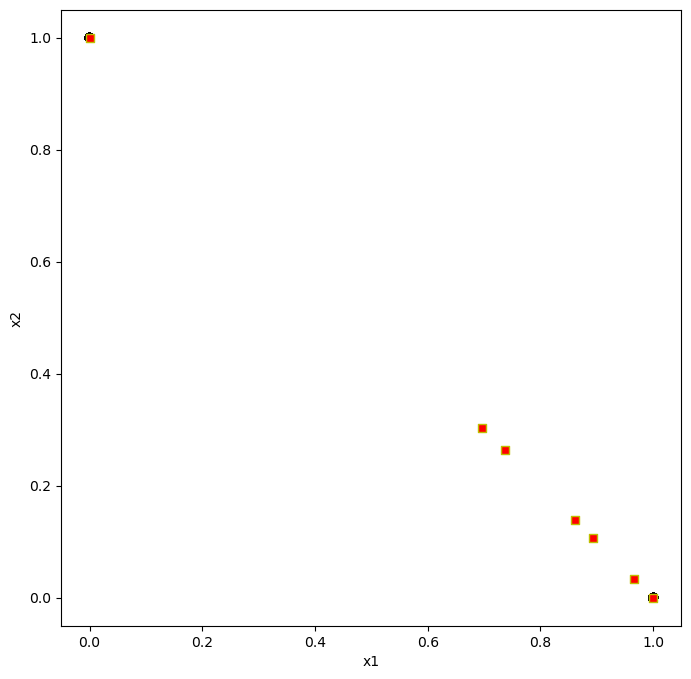

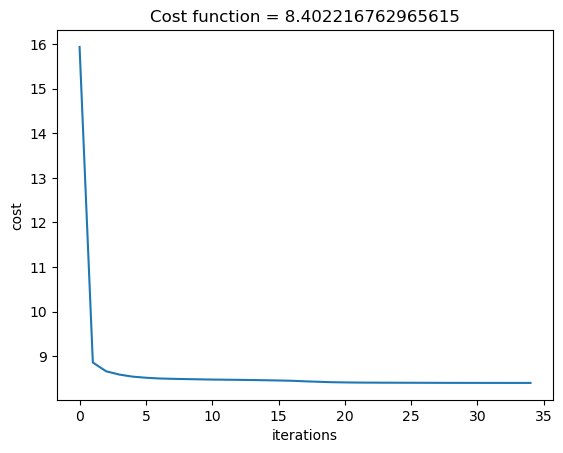

In [37]:
k = 7
mu, c, cluster, J = kmeans(X, k)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired, edgecolors='k') #dataset
plt.scatter(mu[:, 0], mu[:, 1], color='r', edgecolors='y', marker='s'); #centroides
plt.xlabel('x1')
plt.ylabel('x2');
plt.show()

plt.plot(J)
plt.title('Cost function = ' + str(J[len(J)-1]))
plt.xlabel('iterations')
plt.ylabel('cost');

## Graficar el movimiento de centroides

n 35 r,c: 11 3


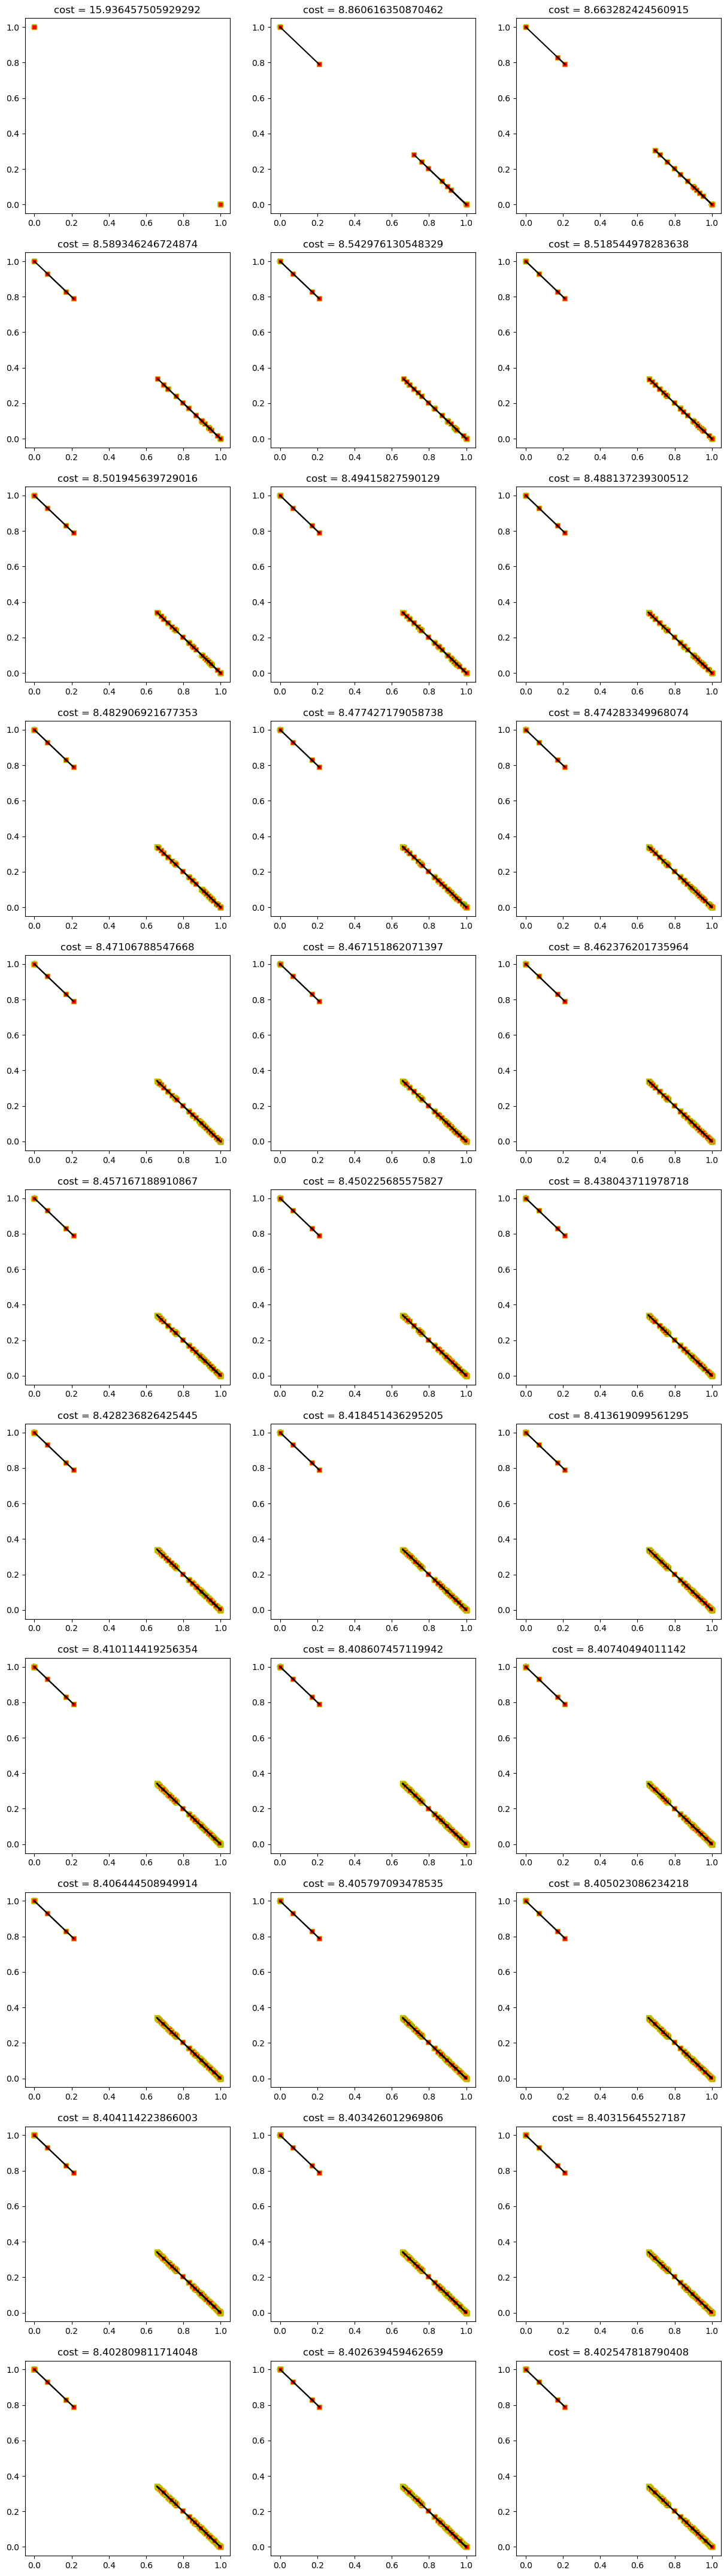

In [38]:
n = len(cluster)
#print(cluster)
cols = 3
rows = int(n / cols)
idx = 0
track = []
print('n', n, 'r,c:', rows, cols)

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))
for i in range(rows):
    img = 0
    for j in range(cols):
        mu, c = cluster[idx]
        track.append(mu)
        axs[i, j].set_title('cost = ' + str(J[idx]))
        axs[i, j].scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired)
        p = track[0]
        for t in track:
            axs[i, j].scatter(t[:, 0], t[:, 1], color='r', edgecolors='y', marker='s');
            xx = [p[:, 0], t[:, 0]]
            yy = [p[:, 1], t[:, 1]]
            p = t
            axs[i, j].plot(xx, yy, 'k');
        idx += 1

## Escoger k

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


Text(0, 0.5, 'cost')

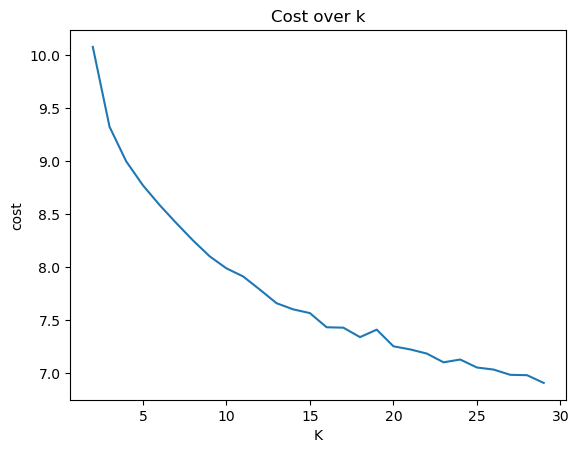

In [42]:
#plot the cost for each k
K = np.arange(2, 30)
print(K)
Jn = []
idx = 0

for k in K:
    mu, c, cluster, J = kmeans(X, k)
    Jn.append(J[-1])
    idx += 1
    
plt.plot(K, Jn)
plt.title('Cost over k')
plt.xlabel('K')
plt.ylabel('cost')